In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tikzplotlib

In [2]:
!pip install tikzplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 813.0 kB/s eta 0:00:00


In [9]:
dir = '.'
key_plots = ['8d4p3o', '10d5p2o']

In [5]:
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

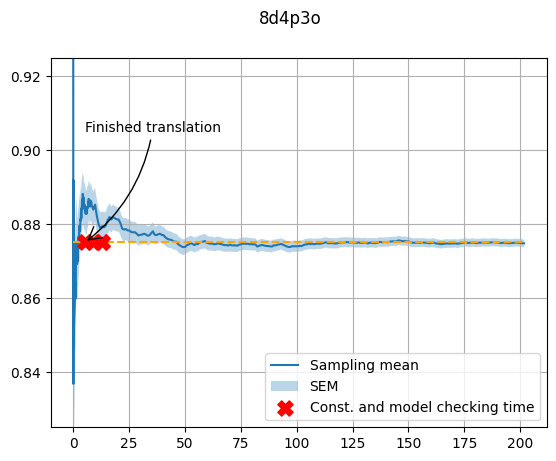

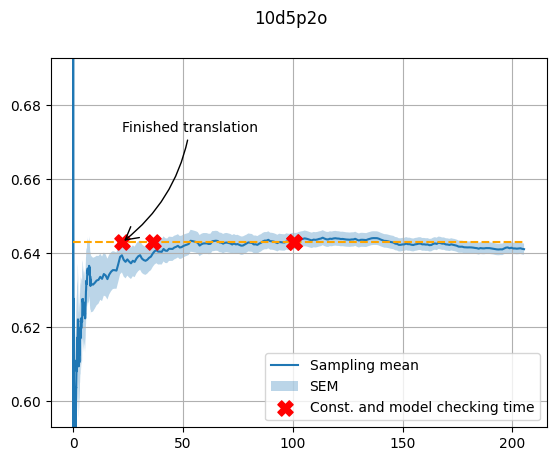

In [12]:
for size in key_plots:
  sample = pd.read_csv(f'{dir}/short_{size}.csv')
  model = pd.read_csv(f'{dir}/times_{size}.csv')
  fig = plt.figure()

  plt.grid()
  plt.plot(sample.iloc[:,2], sample['mean'],label='Sampling mean')
  plt.fill_between(sample.iloc[:,2], sample.iloc[:,3], sample.iloc[:,4], alpha=0.3, label='SEM')
  plt.hlines(model.iloc[0,1], xmin=0, xmax=sample.iloc[-1,2],
             color='orange', linestyles='--', linewidths=1.5)
  plt.scatter(model.iloc[:,0], model.iloc[:,1], marker='X', label='Const. and model checking time',
              s=120, color='r', zorder=2)
  fig.axes[0].annotate('Finished translation', xy=(model.iloc[0]), xytext=(model.iloc[0]+[0,0.03]),
            arrowprops=dict(arrowstyle="->, head_width=0.5,head_length=0.9" , connectionstyle="arc3, rad=-0.2"))
  plt.ylim(model.iloc[0,1]-0.05, model.iloc[0,1]+0.05)
  plt.legend(loc='lower right')
  plt.xlabel = "Time ($s$)"
  plt.ylabel="Sampling mean"
  tikzplotlib_fix_ncols(fig)
  tikzplotlib.save(f"plot_{size}.tex")
  plt.suptitle(size)
  plt.show()

In [13]:
df = pd.read_csv('gen_check_times.csv')
df

,d,p,o,gen_time,check_time
0,5,1,1,0.28,0.06
1,5,1,2,0.14,0.07
2,5,1,3,0.29,0.10
3,5,2,1,0.15,0.07
4,5,2,2,0.20,0.08
...,...,...,...,...,...
105,10,6,2,18.23,34.58
106,10,6,3,24.70,77.53
107,10,7,1,10.12,6.46
108,10,7,2,10.95,8.42


In [14]:
gen_time = np.zeros((10, 10))
for line in df.iterrows():
  l = line[1]
  gen_time[int(l[1])-1, int(l[2])-1] = l[3]
  gen_time[gen_time == 0] = np.nan

gen_time = gen_time[:-2, :-4]
gen_time[:3, -1] = np.inf
gen_time = pd.DataFrame(gen_time)
gen_time.columns = range(1, 7)
gen_time.index = range(1,9)
gen_time.to_csv('10_doors_gen_time.csv')
gen_time

,1,2,3,4,5,6
1,0.63,1.13,9.44,114.73,4120.66,inf
2,2.23,4.10,8.79,112.09,3798.07,inf
3,6.59,7.62,13.23,122.14,4376.56,inf
4,13.99,15.55,21.00,123.30,3874.28,NaN
5,21.19,22.21,28.62,135.57,NaN,NaN
6,17.83,18.23,24.70,NaN,NaN,NaN
7,10.12,10.95,NaN,NaN,NaN,NaN
8,8.31,NaN,NaN,NaN,NaN,NaN


In [19]:
check_time = np.zeros((10, 10))
for line in df.iterrows():
  l = line[1]
  check_time[int(l[1])-1, int(l[2])-1] = l[4]
  check_time[check_time == 0] = np.nan

check_time = check_time[:-2, :-4]
check_time = pd.DataFrame(check_time)
check_time.columns = range(1, 7)
check_time.index = range(1, 9)
check_time.to_csv('10_doors_check_time.csv')
check_time

,1,2,3,4,5,6
1,0.19,0.51,8.48,536.34,NaN,NaN
2,1.32,3.88,46.06,1401.44,NaN,NaN
3,5.98,18.39,136.34,NaN,NaN,NaN
4,19.20,52.89,252.73,NaN,NaN,NaN
5,29.47,64.28,197.26,NaN,NaN,NaN
6,19.96,34.58,77.53,NaN,NaN,NaN
7,6.46,8.42,NaN,NaN,NaN,NaN
8,1.42,NaN,NaN,NaN,NaN,NaN


In [21]:
df = pd.DataFrame({col: zip(gen_time[col], check_time[col]) for col in gen_time.columns})
df.index = range(1,9)
df = df.applymap(lambda c: str(c)[1:-1])
df.to_csv('paper_timesum.csv')

In [22]:
df

,1,2,3,4,5,6
1,"0.63, 0.19","1.13, 0.51","9.44, 8.48","114.73, 536.34","4120.66, nan","inf, nan"
2,"2.23, 1.32","4.1, 3.88","8.79, 46.06","112.09, 1401.44","3798.07, nan","inf, nan"
3,"6.59, 5.98","7.62, 18.39","13.23, 136.34","122.14, nan","4376.56, nan","inf, nan"
4,"13.99, 19.2","15.55, 52.89","21.0, 252.73","123.3, nan","3874.28, nan","nan, nan"
5,"21.19, 29.47","22.21, 64.28","28.62, 197.26","135.57, nan","nan, nan","nan, nan"
6,"17.83, 19.96","18.23, 34.58","24.7, 77.53","nan, nan","nan, nan","nan, nan"
7,"10.12, 6.46","10.95, 8.42","nan, nan","nan, nan","nan, nan","nan, nan"
8,"8.31, 1.42","nan, nan","nan, nan","nan, nan","nan, nan","nan, nan"
